In [10]:
import numpy as np
import matplotlib.pyplot as mpl
import dask.array.fft as dff
import pandas as pd
import dask.array as da

In [11]:
f = open('/home/tyler/Downloads/binaryfarmtest2_12h_225.dat')
rectype = np.dtype([('real',np.float32),('imag',np.float32)])
recs= np.fromfile(f,dtype=rectype)
real= da.from_array(recs['real'])
imag= da.from_array(recs['imag'])

In [19]:
real=recs[:][0]

In [20]:
imag=recs[:][1]

ValueError: x and y must have same first dimension, but have shapes (1,) and (2,)

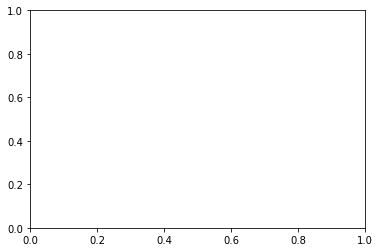

In [26]:
mpl.plot(real,np.linspace(0,len(real),len(real)))

In [2]:
f = open('/home/tyler/Downloads/binaryfarmtest1_20s_225.dat')
rectype = np.dtype([('real',np.float32),('imag',np.float32)])
recs= np.fromfile(f,dtype=rectype)
real= da.from_array(recs['real'])
imag= da.from_array(recs['imag'])
mag=np.sqrt(real**2+imag**2)

In [4]:
byte_list = []

with open('/home/tyler/Downloads/binaryfarmtest1_20s_225.dat', "rb") as f:
    while True:
        byte = f.read(1)
        if not byte:
            break
        byte_list.append(byte)

In [ ]:
for byte in byte_list:
    int_value = ord(byte)
    binary_string = '{0:08b}'.format(int_value)
    print(binary_string)

00000000000000000000000001100010
00000000000000000000000001001000
00000000000000000000000000011011
00000000000000000000000000101011
00000000000000000000000001100010
00000000000000000000000001001000
00000000000000000000000000011011
00000000000000000000000000101011
00000000000000000000000010010011
00000000000000000000000001000011
00000000000000000000000010100100
00000000000000000000000010101110
00000000000000000000000011111111
00000000000000000000000000101010
00000000000000000000000000000000
00000000000000000000000010101111
00000000000000000000000001011011
00000000000000000000000010001111
00000000000000000000000010101011
00000000000000000000000010110000
00000000000000000000000011100011
00000000000000000000000000100101
00000000000000000000000010111100
00000000000000000000000010110000
00000000000000000000000001010110
00000000000000000000000000001001
00000000000000000000000010011111
00000000000000000000000010110001
00000000000000000000000010100100
00000000000000000000000010100011
0000000000

In [16]:
realf=dff.fft(real[:int(len(real)/40)].rechunk(-1))
#magf=dff.fft(mag.rechunk(-1))

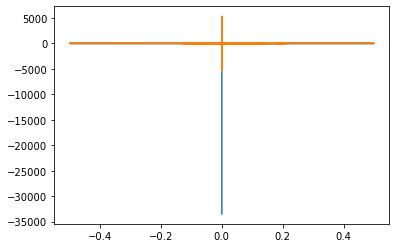

In [17]:
freq=dff.fftfreq(len(realf))
mpl.plot(freq,realf.compute().real, freq,realf.compute().imag)
#mpl.plot(freq,magf.compute().real, freq,realf.compute().imag)